In [1]:
#Importación de librerías

import pandas as pd
import plotly.express as px
import warnings

# Suprime todos los warnings
warnings.filterwarnings('ignore')


import statsmodels.api as sm
import statsmodels.formula.api as sm




In [2]:
#Carga de datos
df = pd.read_csv('apartments.csv')
df.columns


Index(['codigo', 'tipo_propiedad', 'tipo_operacion', ' precio_venta ',
       ' precio_arriendo ', 'area', 'habitaciones', 'banos',
       ' administracion ', 'parqueaderos', 'sector', 'estrato', 'antiguedad',
       'estado', 'longitud', 'latitud', 'descripcion', 'datetime', 'website',
       'compañia', 'fecha_actualizacion_precio_venta', 'precio_venta_anterior',
       'fecha_actualizacion_precio_arriendo', 'precio_arriendo_anterior',
       'jacuzzi', 'piso', 'closets', 'chimenea', 'permite_mascotas',
       'gimnasio', 'ascensor', 'conjunto_cerrado', 'coords_modified',
       'localidad', 'barrio', 'estacion_tm_cercana', 'distancia_estacion_tm_m',
       'is_cerca_estacion_tm', 'Unnamed: 38', 'contar', 'sector.1'],
      dtype='object')

In [3]:
df.head()

,codigo,tipo_propiedad,tipo_operacion,precio_venta,precio_arriendo,area,habitaciones,banos,administracion,parqueaderos,...,conjunto_cerrado,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm,Unnamed: 38,contar,sector.1
0,374-M2718950,APARTAMENTO,VENTA Y ARRIENDO,"$2,500,000,000.00","$13,500,000",320.0,4.0,5.0,"$2,500,000",3.0,...,1,False,USAQUEN,CIUDADELA REAL,Alcalá,2798.28,0,NaN,9861.0,chico
1,2510-M4156145,APARTAMENTO,VENTA,"$485,000,000.00",NaN,84.0,3.0,3.0,"$680,000",1.0,...,1,False,USAQUEN,SAN PATRICIO,Pepe Sierra,1116.77,0,NaN,3775.0,country
2,10312-M2873283,APARTAMENTO,VENTA Y ARRIENDO,"$1,980,000,000.00","$9,000,000",248.0,3.0,3.0,"$2,200,000",3.0,...,1,False,USAQUEN,CERROS DE SANTA BARBARA,Pepe Sierra,3140.36,0,NaN,210.0,chapinero
3,10139-M4343016,APARTAMENTO,VENTA,"$495,000,000.00",NaN,77.2,3.0,2.0,"$367,000",1.0,...,1,False,SUBA,CAMPOS DE SILENCIO,Calle 161,933.85,0,NaN,2706.0,cedritos
4,10139-M3692828,APARTAMENTO,VENTA,"$1,570,000,000.00",NaN,213.0,3.0,4.0,"$994,000",3.0,...,1,False,USAQUEN,GINEBRA,Prado,2769.19,0,NaN,788.0,kennedy


In [4]:
df.drop(columns=['Unnamed: 38', 'codigo', 'contar', 'sector.1', 'coords_modified', 'is_cerca_estacion_tm'], inplace=True)

In [5]:
len(df.localidad.value_counts())

19

<Axes: >

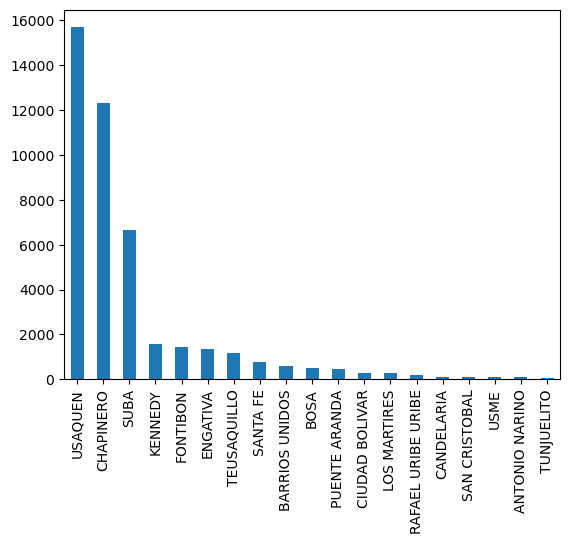

In [20]:
df1 = df.localidad.value_counts()
df1.plot.bar()

In [ ]:
sum((df.localidad == 'SUBA'))

In [7]:
inmuebles = (df.localidad == 'SUBA')
inmuebles_suba = df[inmuebles]
inmuebles_suba.head()

,tipo_propiedad,tipo_operacion,precio_venta,precio_arriendo,area,habitaciones,banos,administracion,parqueaderos,sector,...,closets,chimenea,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m
3,APARTAMENTO,VENTA,"$495,000,000.00",NaN,77.2,3.0,2.0,"$367,000",1.0,COLINA Y ALREDEDORES,...,3.0,0,1,1,1,1,SUBA,CAMPOS DE SILENCIO,Calle 161,933.85
5,APARTAMENTO,VENTA,"$750,000,000.00",NaN,142.0,3.0,3.0,"$400,000",2.0,COLINA Y ALREDEDORES,...,4.0,1,0,1,1,1,SUBA,URB. LA SIRENA,Mazurén,1704.02
24,APARTAMENTO,VENTA,"$320,000,000.00",NaN,69.0,3.0,2.0,"$230,000",1.0,COLINA Y ALREDEDORES,...,1.0,0,0,0,1,1,SUBA,CANTALEJO,Calle 161,1161.57
28,APARTAMENTO,VENTA,"$800,000,000.00",NaN,151.0,3.0,4.0,"$650,000",2.0,ALTOS DE SUBA Y CERROS DE SAN JORGE,...,1.0,1,0,0,1,0,SUBA,SALAMANCA Y CATALAYUD,21 Ángeles,761.02
35,APARTAMENTO,VENTA,"$720,000,000.00",NaN,133.0,3.0,4.0,"$495,900",1.0,COLINA Y ALREDEDORES,...,1.0,0,0,0,1,1,SUBA,COLPATRIA SANTA HELENA II SECTOR,Gratamira,1345.15


In [8]:
inmuebles_suba.drop(columns=['localidad','sector'])

,tipo_propiedad,tipo_operacion,precio_venta,precio_arriendo,area,habitaciones,banos,administracion,parqueaderos,estrato,...,piso,closets,chimenea,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,barrio,estacion_tm_cercana,distancia_estacion_tm_m
3,APARTAMENTO,VENTA,"$495,000,000.00",NaN,77.2,3.0,2.0,"$367,000",1.0,4.0,...,2.0,3.0,0,1,1,1,1,CAMPOS DE SILENCIO,Calle 161,933.85
5,APARTAMENTO,VENTA,"$750,000,000.00",NaN,142.0,3.0,3.0,"$400,000",2.0,5.0,...,7.0,4.0,1,0,1,1,1,URB. LA SIRENA,Mazurén,1704.02
24,APARTAMENTO,VENTA,"$320,000,000.00",NaN,69.0,3.0,2.0,"$230,000",1.0,3.0,...,NaN,1.0,0,0,0,1,1,CANTALEJO,Calle 161,1161.57
28,APARTAMENTO,VENTA,"$800,000,000.00",NaN,151.0,3.0,4.0,"$650,000",2.0,6.0,...,NaN,1.0,1,0,0,1,0,SALAMANCA Y CATALAYUD,21 Ángeles,761.02
35,APARTAMENTO,VENTA,"$720,000,000.00",NaN,133.0,3.0,4.0,"$495,900",1.0,5.0,...,NaN,1.0,0,0,0,1,1,COLPATRIA SANTA HELENA II SECTOR,Gratamira,1345.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43667,APARTAMENTO,VENTA,"$410,000,000.00",NaN,80.0,3.0,2.0,"$534,000",1.0,5.0,...,3.0,NaN,1,0,0,1,1,PUENTE LARGO III SECTOR,Puentelargo,535.95
43669,APARTAMENTO,VENTA,"$148,000,000.00",NaN,48.0,2.0,1.0,"$65,000",0.0,3.0,...,NaN,1.0,0,0,0,0,1,CONJUNTO RESIDENCIAL YERBAMORA 2,Portal de Suba,1770.34
43670,APARTAMENTO,VENTA,"$660,000,000.00",NaN,135.0,3.0,3.0,"$480,000",2.0,4.0,...,3.0,4.0,0,0,1,1,1,SANTA HELENA_,Calle 142,1171.09
43676,APARTAMENTO,VENTA,"$580,000,000.00",NaN,107.0,3.0,3.0,"$397,000",2.0,4.0,...,9.0,4.0,0,0,1,1,1,SANTA HELENA_,Calle 142,950.26


In [9]:
len(inmuebles_suba.barrio.value_counts())

502

In [10]:
nn=inmuebles_suba.barrio.value_counts()
nn.head(50)

EL BATAN                                395
MAZUREN                                 206
S.C. PASADENA                           193
CASABLANCA (HACIENDA)                   175
CAMPOS DE SILENCIO                      169
URB. LA SIRENA                          141
PUENTE LARGO SECTOR I Y II              131
EL PINAR                                127
COLPATRIA SANTA HELENA II SECTOR        112
BATAN LOTE NIZA XII                     109
LA VICTORIA NORTE                       106
S.C. NIZA SUBA                           93
PRADO PINZON                             86
NIZA SUR                                 85
LA ALHAMBRA SECTOR SUR                   84
EL CORTIJO (FINCA)                       81
S.C. PORTALES DEL NORTE                  81
BURGOS BRITALIA                          76
LAGOS DE CORDOBA                         74
PUENTE LARGO III SECTOR                  70
LA ALHAMBRA SECTOR NORTE                 66
URB. PLAZA BAVIERA                       64
S.C. GILMAR - LA SIRENA (PREDIO)

<Axes: >

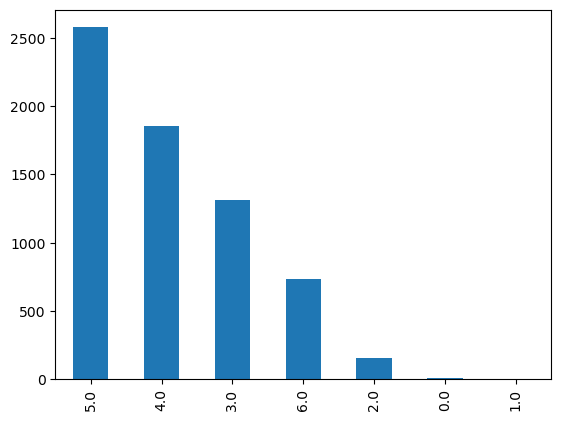

In [11]:
df3 = inmuebles_suba.estrato.value_counts()
df3.plot.bar()

In [12]:
inmuebles_suba.columns

Index(['tipo_propiedad', 'tipo_operacion', ' precio_venta ',
       ' precio_arriendo ', 'area', 'habitaciones', 'banos',
       ' administracion ', 'parqueaderos', 'sector', 'estrato', 'antiguedad',
       'estado', 'longitud', 'latitud', 'descripcion', 'datetime', 'website',
       'compañia', 'fecha_actualizacion_precio_venta', 'precio_venta_anterior',
       'fecha_actualizacion_precio_arriendo', 'precio_arriendo_anterior',
       'jacuzzi', 'piso', 'closets', 'chimenea', 'permite_mascotas',
       'gimnasio', 'ascensor', 'conjunto_cerrado', 'localidad', 'barrio',
       'estacion_tm_cercana', 'distancia_estacion_tm_m'],
      dtype='object')

In [13]:
inmuebles_suba.columns = inmuebles_suba.columns.str.strip()

In [14]:
df_clean = inmuebles_suba.dropna(subset=['precio_venta'])

In [15]:
df_clean['precio_venta'] = df_clean['precio_venta'].str.replace('$', '', regex=False).str.replace(',', '').astype(float)

In [16]:
df_clean['precio_venta'] = pd.to_numeric(df_clean['precio_venta'], errors='coerce')


In [17]:
df_clean

,tipo_propiedad,tipo_operacion,precio_venta,precio_arriendo,area,habitaciones,banos,administracion,parqueaderos,sector,...,closets,chimenea,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m
3,APARTAMENTO,VENTA,495000000.0,NaN,77.2,3.0,2.0,"$367,000",1.0,COLINA Y ALREDEDORES,...,3.0,0,1,1,1,1,SUBA,CAMPOS DE SILENCIO,Calle 161,933.85
5,APARTAMENTO,VENTA,750000000.0,NaN,142.0,3.0,3.0,"$400,000",2.0,COLINA Y ALREDEDORES,...,4.0,1,0,1,1,1,SUBA,URB. LA SIRENA,Mazurén,1704.02
24,APARTAMENTO,VENTA,320000000.0,NaN,69.0,3.0,2.0,"$230,000",1.0,COLINA Y ALREDEDORES,...,1.0,0,0,0,1,1,SUBA,CANTALEJO,Calle 161,1161.57
28,APARTAMENTO,VENTA,800000000.0,NaN,151.0,3.0,4.0,"$650,000",2.0,ALTOS DE SUBA Y CERROS DE SAN JORGE,...,1.0,1,0,0,1,0,SUBA,SALAMANCA Y CATALAYUD,21 Ángeles,761.02
35,APARTAMENTO,VENTA,720000000.0,NaN,133.0,3.0,4.0,"$495,900",1.0,COLINA Y ALREDEDORES,...,1.0,0,0,0,1,1,SUBA,COLPATRIA SANTA HELENA II SECTOR,Gratamira,1345.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43667,APARTAMENTO,VENTA,410000000.0,NaN,80.0,3.0,2.0,"$534,000",1.0,NIZA ALHAMBRA,...,NaN,1,0,0,1,1,SUBA,PUENTE LARGO III SECTOR,Puentelargo,535.95
43669,APARTAMENTO,VENTA,148000000.0,NaN,48.0,2.0,1.0,"$65,000",0.0,ALTOS DE SUBA Y CERROS DE SAN JORGE,...,1.0,0,0,0,0,1,SUBA,CONJUNTO RESIDENCIAL YERBAMORA 2,Portal de Suba,1770.34
43670,APARTAMENTO,VENTA,660000000.0,NaN,135.0,3.0,3.0,"$480,000",2.0,COLINA Y ALREDEDORES,...,4.0,0,0,1,1,1,SUBA,SANTA HELENA_,Calle 142,1171.09
43676,APARTAMENTO,VENTA,580000000.0,NaN,107.0,3.0,3.0,"$397,000",2.0,COLINA Y ALREDEDORES,...,4.0,0,0,1,1,1,SUBA,SANTA HELENA_,Calle 142,950.26


In [18]:
print(df_clean.isnull().sum())

tipo_propiedad                            0
tipo_operacion                            0
precio_venta                              0
precio_arriendo                        5149
area                                      0
habitaciones                              0
banos                                     0
administracion                          538
parqueaderos                              0
sector                                  244
estrato                                   2
antiguedad                                0
estado                                  186
longitud                                  0
latitud                                   0
descripcion                               1
datetime                                  0
website                                   0
compañia                               2301
fecha_actualizacion_precio_venta       5087
precio_venta_anterior                  5089
fecha_actualizacion_precio_arriendo    5195
precio_arriendo_anterior        

In [19]:
formula1= " precio_venta ~ C(estrato) +C(barrio) + C(area) +C(banos) + C(habitaciones)+ C(antiguedad)"
model1=sm.ols(formula=formula1, data=df_clean).fit()
# fitted1=model1.fit()
model1.summary()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           precio_venta   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                 -0.128
Method:                 Least Squares   F-statistic:                    0.5703
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               1.00
Time:                        09:15:33   Log-Likelihood:            -1.2440e+05
No. Observations:                5119   AIC:                         2.515e+05
Df Residuals:                    3771   BIC:                         2.603e+05
Df Model:                        1347                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------